1.1. Limpeza e Análise de Dados de Vendas

In [56]:
import csv

import numpy as np

produtos = [('Camisa', 'Vestuário', 0),
           ('Calça', 'Vestuário', 1),
           ('Tênis', 'Vestuário', 2),
           ('Meia', 'Vestuário', 3),
           ('Casaco', 'Vestuário', 4),
           ('Cueca', 'Vestuário', 5),
           ('Sunga', 'Vestuário', 6),
           ('Maçã', 'Frutas', 7),
           ('Pera', 'Frutas', 8),
           ('Banana', 'Frutas', 9),
           ('Tâmara', 'Frutas', 10),
           ('Uva', 'Frutas', 11),
           ('Ameixa', 'Frutas', 12),
           ('Creme-Dental', 'Higiene', 13),
           ('Escova-de-Dente', 'Higiene', 14),
           ('Lâmina-de-Barbear', 'Higiene', 15),
           ('Absorvente', 'Higiene', 16),
           ('Shampoo', 'Higiene', 17),
           ('Condicionador', 'Higiene', 18),
           ('Fio-Dental', 'Higiene', 19),
           ('Coca-Cola', 'Bebidas', 20),
           ('Sprite', 'Bebidas', 21),
           ('Guaraná', 'Bebidas', 22),
           ('Pepsi', 'Bebidas', 23),
           ('Água', 'Bebidas', 24),
           ('Suco-de-Uva', 'Bebidas', 25),
           ('Suco-de-Laranja', 'Bebidas', 26),
           ('Bola-de-Futebol', 'Esportes', 27),
           ('Bola-de-Vôlei', 'Esportes', 28),
           ('Raquete-de-Tênis', 'Esportes', 29),
           ('Bola-de-Tênis', 'Esportes', 30),
           ('Água-Sanitária', 'Limpeza', 31),
           ('Desinfetante', 'Limpeza', 32),
           ('Sabão-em-Pó', 'Limpeza', 33),
           ('Sabão-de-Coco', 'Limpeza', 34)]
len(produtos)

35

1.1.1. Geração de dataset fictício

In [57]:
available_months = list(range(1, 13))

In [58]:
import random
import pandas as pd
random.seed(42)

def generate_data(produtos: list) -> pd.DataFrame:
    available_months = list(range(1, 13))
    data = []
    for month in available_months:
        rows_quantity = random.randint(10, 30) # generates at least 10 rows and a maximum of 30
        products_list = random.sample(produtos, rows_quantity)  # selects a unique set of products (no duplicates) for this month
        for i in range(rows_quantity):
            product = products_list[i]

            day = random.randint(1, 28) # [1,28] to avoid date errors such as (2023-02-30)
            year = 2023
            date_error = random.random()
            divider = '-'
            if date_error <= 0.4: # there is 40% of chance to use a different divider for the date
                divider = '.'
            product_date = str(year) + divider + str(month) + divider + str(day)

            name, category, id = product

            # the hash guarantees that each product will have a base price and the random(0.8, 1.2) generates plausible prices drops and rises
            base_price = abs(hash(name)) % 1000
            price = base_price * random.uniform(0.8, 1.2)
            quantity = random.randint(1, 20)

            duplicate = random.random()
            if duplicate <= 0.3: # there is 30% of chance to generate duplicates
                repeat = 2
            else:
                repeat = 1

            for i in range(repeat):
                data.append({'ID': id,
                    'Produto': name,
                    'Categoria': category,
                    'Data': product_date,
                    'Quantidade': quantity,
                    'Preco': price})

    return pd.DataFrame(data)

In [59]:
df = generate_data(produtos)
df

,ID,Produto,Categoria,Data,Quantidade,Preco
0,7,Maçã,Frutas,2023-1-26,6,955.650872
1,1,Calça,Vestuário,2023.1.11,11,71.776166
2,1,Calça,Vestuário,2023.1.11,11,71.776166
3,17,Shampoo,Higiene,2023.1.13,20,879.306260
4,17,Shampoo,Higiene,2023.1.13,20,879.306260
...,...,...,...,...,...,...
359,12,Ameixa,Frutas,2023-12-17,16,921.758959
360,12,Ameixa,Frutas,2023-12-17,16,921.758959
361,17,Shampoo,Higiene,2023-12-13,1,695.927201
362,18,Condicionador,Higiene,2023.12.3,4,992.604179


1.1.2. Limpeza dos dados

In [60]:
# remove duplicates
df.drop_duplicates(inplace=True)
df

,ID,Produto,Categoria,Data,Quantidade,Preco
0,7,Maçã,Frutas,2023-1-26,6,955.650872
1,1,Calça,Vestuário,2023.1.11,11,71.776166
3,17,Shampoo,Higiene,2023.1.13,20,879.306260
5,15,Lâmina-de-Barbear,Higiene,2023-1-2,13,597.535338
7,34,Sabão-de-Coco,Limpeza,2023-1-10,12,583.406201
...,...,...,...,...,...,...
358,33,Sabão-em-Pó,Limpeza,2023.12.12,17,157.626109
359,12,Ameixa,Frutas,2023-12-17,16,921.758959
361,17,Shampoo,Higiene,2023-12-13,1,695.927201
362,18,Condicionador,Higiene,2023.12.3,4,992.604179


In [61]:
# fix the names and dates of products
df['Data'] =  df['Data'].str.replace('.', '-') # fix the dot format
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d') # cast the date column from string to datetime
df['Produto'] = df['Produto'].str.replace('-', ' ')
df

,ID,Produto,Categoria,Data,Quantidade,Preco
0,7,Maçã,Frutas,2023-01-26,6,955.650872
1,1,Calça,Vestuário,2023-01-11,11,71.776166
3,17,Shampoo,Higiene,2023-01-13,20,879.306260
5,15,Lâmina de Barbear,Higiene,2023-01-02,13,597.535338
7,34,Sabão de Coco,Limpeza,2023-01-10,12,583.406201
...,...,...,...,...,...,...
358,33,Sabão em Pó,Limpeza,2023-12-12,17,157.626109
359,12,Ameixa,Frutas,2023-12-17,16,921.758959
361,17,Shampoo,Higiene,2023-12-13,1,695.927201
362,18,Condicionador,Higiene,2023-12-03,4,992.604179


1.1.3. Salvar o dataset limpo

In [62]:
# save the dataset
df.to_csv('data_clean.csv', index=False)

1.1.4. Calcular o total de vendas (Quantidade * Preço) por produto

In [63]:
# calculate the total of sales of each row (price * quantity)
df['Total de Vendas'] = df['Quantidade'] * df['Preco']
df['Total de Vendas']

0       5733.905232
1        789.537825
3      17586.125207
5       7767.959399
7       7000.874410
           ...     
358     2679.643860
359    14748.143348
361      695.927201
362     3970.416716
363     9349.454187
Name: Total de Vendas, Length: 280, dtype: float64

1.1.5. Identificar o produto com o maior número de vendas totais

In [64]:
# display the quantity of sold units per product
quantity_of_sold_products = df.groupby('Produto')['Quantidade'].sum()
quantity_of_sold_products

Produto
Absorvente            76
Ameixa                74
Banana                91
Bola de Futebol      108
Bola de Tênis         84
Bola de Vôlei        106
Calça                116
Camisa               100
Casaco                98
Coca Cola             85
Condicionador         78
Creme Dental          55
Cueca                 79
Desinfetante          91
Escova de Dente       58
Fio Dental            71
Guaraná               76
Lâmina de Barbear     88
Maçã                  51
Meia                 121
Pepsi                129
Pera                  82
Raquete de Tênis     120
Sabão de Coco         79
Sabão em Pó           82
Shampoo              135
Sprite               104
Suco de Laranja       81
Suco de Uva           44
Sunga                 83
Tâmara               105
Tênis                 64
Uva                   66
Água                  97
Água Sanitária        49
Name: Quantidade, dtype: int64

In [96]:
# display the most sold product
most_sold_product_name, most_sold_product_quantity = quantity_of_sold_products.idxmax(), quantity_of_sold_products.max()
most_sold_product_name, int(most_sold_product_quantity) # display a tuple (name, quantity)

('Shampoo', 135)

1.2. Análise Exploratória de Dados de Vendas

1.2.1. Criar um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.


In [66]:
import matplotlib.pyplot as plt

df['Mes'] = df['Data'].dt.month
monthly_total_sales = df.groupby('Mes')['Total de Vendas'].sum()
monthly_mean_sales = df.groupby('Mes')['Total de Vendas'].mean()
monthly_median_sales = df.groupby('Mes')['Total de Vendas'].median()
monthly_mean_sales

Mes
1     5742.656815
2     5301.501556
3     5377.240595
4     6218.949333
5     6054.207611
6     7058.772875
7     6369.222235
8     5736.443084
9     4509.398185
10    4038.804668
11    6127.371230
12    5443.652614
Name: Total de Vendas, dtype: float64

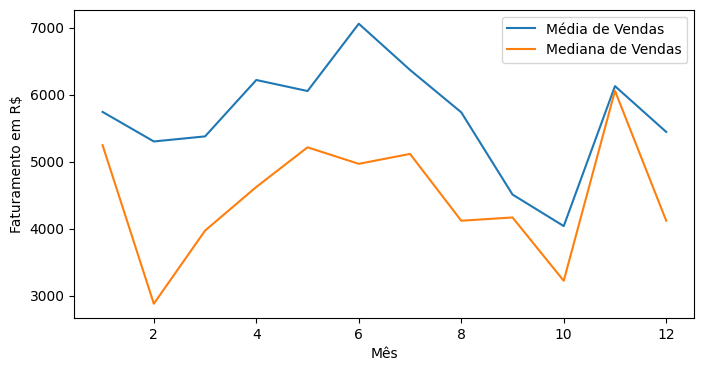

In [67]:
plt.figure(figsize = (8, 4))
plt.plot(monthly_mean_sales, label='Média de Vendas')
plt.plot(monthly_median_sales, label='Mediana de Vendas')
plt.xlabel('Mês')
plt.ylabel('Faturamento em R$')
plt.legend()
plt.show()

A média de vendas apresenta um aumento até o mês 6, atingindo o pico, e depois uma queda gradual até o mês 10, com uma recuperação leve nos meses 11 e 12.
Isso sugere uma possível sazonalidade, em que o meio do ano apresenta melhores resultados de vendas e o final do ano, antes de novembro, tem um desempenho mais fraco.
Além disso, a mediana de vendas está consistentemente abaixo da média na maioria dos meses, o que indica que existem alguns valores de vendas muito altos que estão puxando a média para cima.

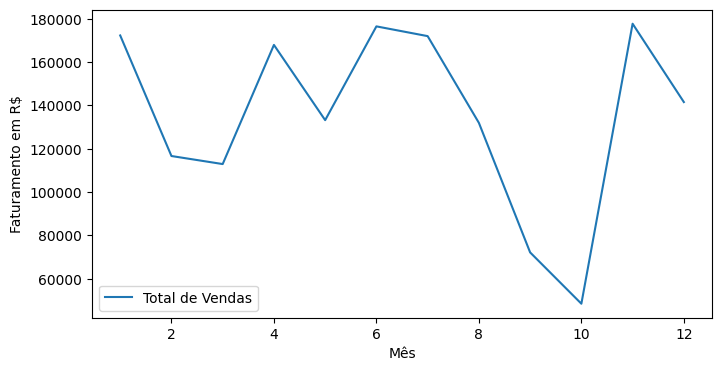

In [68]:
plt.figure(figsize = (8, 4))
plt.plot(monthly_total_sales, label='Total de Vendas')
plt.xlabel('Mês')
plt.ylabel('Faturamento em R$')
plt.legend()
plt.show()

A função lê um arquivo CSV (data_clean.csv), percorre cada linha de dados e gera automaticamente comandos SQL INSERT INTO correspondentes. Esses comandos são escritos em um arquivo de saída chamado inserts.sql. O arquivo serve para facilitar o uso do banco de dados na questão seguinte.

In [94]:
def to_sql():
    '''
    Read a CSV file (data_clean.csv), iterates over each data row, and automatically generates corresponding SQL INSERT INTO commands. These commands are then written to an output file called inserts.sql.
    '''
    with open('data_clean.csv', 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)
        inserts = open('inserts.sql', 'w', encoding='utf-8')
        for row in reader:
            sql_template = ("INSERT INTO vendas (id_produto, nome, categoria, data, quantidade, preco) VALUES ({}, '{}', '{}', '{}', {}, {});\n" )

            line = sql_template.format(row[0], row[1], row[2], row[3], row[4], row[5])
            inserts.write(line)
        inserts.close()

In [95]:
to_sql()